In [54]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

events = ['Sumatra2004', 'Maule2010','Tohoku2011', 'Kamchatka2025']
files = ["/Users/hyin/shakemap_profiles/default/data/official20041226005853450_30/moment_rate.mr",
         '/Users/hyin/shakemap_profiles/default/data/official20100227063411530_30/moment_rate.mr',
         '/Users/hyin/shakemap_profiles/default/data/official20110311054624120_30/moment_rate.mr',
         '/Users/hyin/shakemap_profiles/default/data/us6000qw60/moment_rate.mr.txt']
# events = ['Maule2010']
# files = ['/Users/hyin/shakemap_profiles/default/data/official20100227063411530_30/moment_rate.mr']

# events = ['Sumatra2004']
# files = ["/Users/hyin/shakemap_profiles/default/data/official20041226005853450_30/moment_rate.mr"]
for i in range(len(files)):
    file = files[i]
    event = events[i]
    usgs = np.loadtxt(file, skiprows=2)
    if event == 'Sumatra2004':
        print((usgs[:, 1]/1e12).max())
        


192420000.0


Sumatra2004
[[0.0000e+00 0.0000e+00]
 [1.0000e-02 2.7047e+10]
 [2.0000e-02 1.3524e+11]
 ...
 [9.6748e+02 0.0000e+00]
 [9.6749e+02 0.0000e+00]
 [9.6750e+02 0.0000e+00]]
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.6748e+02 9.6749e+02 9.6750e+02]
Maule2010
Maule or Tohoku
Tohoku2011
Maule or Tohoku
Kamchatka2025
[[0.0000e+00 0.0000e+00]
 [1.0000e-02 2.7902e+12]
 [2.0000e-02 1.3950e+13]
 ...
 [3.7307e+02 0.0000e+00]
 [3.7308e+02 0.0000e+00]
 [3.7309e+02 0.0000e+00]]
[0.0000e+00 1.0000e-02 2.0000e-02 ... 3.7307e+02 3.7308e+02 3.7309e+02]


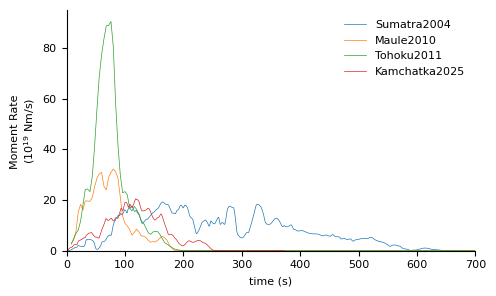

In [55]:
# Set matplotlib parameters for consistent plotting
ps = 8
matplotlib.rcParams.update({"font.size": ps})
plt.rcParams["font.family"] = "sans"
matplotlib.rc("xtick", labelsize=ps)
matplotlib.rc("ytick", labelsize=ps)
matplotlib.rcParams['lines.linewidth'] = 0.5

# Create figure and axis for mainshock
fig, ax = plt.figure(figsize=(5, 3)), plt.subplot(111)


for i in range(len(files)):
    file = files[i]
    event = events[i]
    # event = 'Sumatra2004'
    usgs = np.loadtxt(file, skiprows=2)
    print(event)
    # Moment rate (newton-meters)
    # If statement distinguishes events reported in cm-dyne vs. Nm
    if event == 'Maule2010' or event == 'Tohoku2011':
        ax.plot(usgs[:, 0], usgs[:, 1]/1e26, "-",label=event)
        print("Maule or Tohoku")
        pass
    else: 
        print(usgs)
        ax.plot(usgs[:, 0], usgs[:, 1]/1e19, "-",label=event)  # k:
        print(usgs[:, 0])
ax.legend(frameon=False, loc="upper right")
ax.set_xlim([0, 700])
ax.set_ylim(bottom=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylabel("Moment Rate \n"+r"($10^{19}$ Nm/s)")
ax.set_xlabel("time (s)")

# Adjust layout to prevent label cutoff
plt.tight_layout()
plotname = 'moment-rate-comparison.png'
fig.savefig(plotname, bbox_inches="tight", transparent=True, dpi=300)
